## Turning on/off the convolution in residmap()
Fermipy generates residual maps using **convolved** counts map and model map. Near the Galactic plane (|b| < 10 deg) where the fluctuation in the Galactic diffuse emission is large, it results in exagerated positive and negative excess, false-signaling the bad fit of the model.<br><br>
*residmap_conv* works exactly the same as <code>residmap()</code> in Fermipy except that it allows you to turn on/off the convolution. This code demonstrates how to use *residmap_conv* and compares it with <code>residmap()</code> in Fermipy. The ROI is centered at 4FGL J1420.3-6046e (HESS J1420-607) (b = 0.27 deg).

In [1]:
import numpy as np
import os
import yaml

import matplotlib.pyplot as plt
import matplotlib
from fermipy.gtanalysis import GTAnalysis
from fermipy.plotting import ROIPlotter
from scipy.stats import norm


Bad key "text.kerning_factor" on line 4 in
/a/share/ged/src/miniconda3/envs/fermipy-1.0.1/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.2/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
prefix = "Kookaburra_1"

wdir = "{}/".format(os.environ.get('FERMI_ANALYSIS_DIR'))
outdir = "{}{}/".format(wdir, prefix)
config = "{}{}_pipeline_config.yml".format(wdir, prefix)

with open(config, 'r') as config_file:
    pipeline_config = yaml.safe_load(config_file)

if not pipeline_config.get('fermipy_config'):
    pipeline_config['fermipy_config'] = prefix + '_config.yml'

with open(wdir + pipeline_config['fermipy_config'], 'r') as config_file:
    fermipy_config = yaml.safe_load(config_file)

if 'fileio' not in fermipy_config:
    fermipy_config['fileio'] = {}
if 'outdir' not in fermipy_config['fileio']:
    fermipy_config['fileio']['outdir'] = outdir

In [3]:
gta = GTAnalysis(fermipy_config, logging={'verbosity': 3})
gta.setup()

2021-10-19 13:28:54 INFO    GTAnalysis.__init__(): 
--------------------------------------------------------------------------------
fermipy version v1.0.1 
ScienceTools version 2.0.8
2021-10-19 13:28:57 INFO    GTAnalysis.setup(): Running setup.
2021-10-19 13:28:57 INFO    GTBinnedAnalysis.setup(): Running setup for component 00
2021-10-19 13:28:57 INFO    GTBinnedAnalysis._select_data(): Skipping data selection.
2021-10-19 13:28:57 INFO    GTBinnedAnalysis._create_ltcube(): Skipping LT Cube.
/a/share/ged/src/miniconda3/envs/fermipy-1.0.1/lib/python3.7/site-packages/fermipy/irfs.py:51: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  log_ratio = np.log(x[xs1] / x[xs0])
/a/share/ged/src/miniconda3/envs/fermipy-1.0.1/lib/python3.7/site-packages/fermipy/irfs.py:52: F

The fitting has been done and returned successfully. Sources that were deleted / freed are as follows.
- delete_sources:
    - {minmax_ts: [null, 4]}
    - {minmax_npred: [null, 1]}
- free_source: 
    - {name: "isodiff"}
    - {name: "galdiff"}
    - {name: "HESS J1420-607"}
- free_sources:
    - {minmax_ts: [25, null]}
    - {distance: 5.0}

The fit result is loaded.

In [4]:
gta.load_roi(prefix)

2021-10-19 13:29:54 INFO    GTAnalysis.load_roi(): Loading ROI file: /a/data/tehanu/jw3855/fermi_analysis/Kookaburra_1/Kookaburra_1.npy
2021-10-19 13:29:54 INFO    GTBinnedAnalysis._create_binned_analysis(): Creating BinnedAnalysis for component 00.
2021-10-19 13:30:29 INFO    GTAnalysis.load_roi(): Finished Loading ROI


In [5]:
gta.print_model()

2021-10-19 13:30:29 INFO    GTAnalysis.print_model(): 
sourcename            offset    norm  eflux     index        ts       npred free
--------------------------------------------------------------------------------
4FGL J1420.3-6046e     0.000   0.547  1.97e-05   1.78    204.06      3389.8    *
4FGL J1420.0-6048      0.042   2.067  9.59e-05   3.36   4985.46     62326.0    *
4FGL J1418.7-6057      0.264   2.263   0.00016   2.97  14931.74     89584.0    *
4FGL J1419.2-6029      0.322   2.365  1.04e-05   2.32     77.17      6476.4    *
4FGL J1422.3-6059      0.326   1.705  1.02e-05   2.56     99.00      5331.1    *
4FGL J1417.7-6057      0.354   2.310  1.66e-05   2.08    121.84      6626.6    *
4FGL J1418.7-6110      0.436   0.270  3.48e-05   4.11    688.81     26123.0    *
4FGL J1420.9-6127c     0.683   0.882  4.84e-06   1.99     28.18      1562.8    *
4FGL J1415.3-6110c     0.720   0.401  6.58e-06   2.21     26.30      3397.0    *
4FGL J1422.5-6137      0.889   0.878   3.3e-05   2.28 

In [6]:
print(gta.roi[gta.config['selection']['target']])

Name           : 4FGL J1420.3-6046e
Associations   : ['4FGL J1420.3-6046e', 'HESS J1420-607', '3EG J1420-6038']
RA/DEC         :    215.082/   -60.782
GLON/GLAT      :    313.571/     0.240
TS             : 204.06
Npred          : 3389.79
Flux           : 1.164e-08 +/- 1.76e-10
EnergyFlux     : 1.967e-05 +/- 1.12e-07
SpatialModel   : RadialDisk
SpectrumType   : PowerLaw
Spectral Parameters
b'Prefactor'   :  5.475e-15 +/-  3.044e-17
b'Index'       :     -1.783 +/-  -0.003352
b'Scale'       :  2.331e+04 +/-        nan


These are what the counts and model map look like **before convolution**.

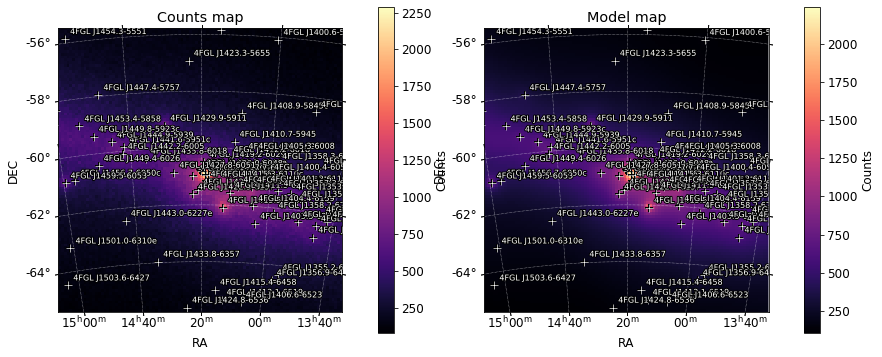

In [7]:
fig = plt.figure(figsize=(14,6))
ROIPlotter(gta.counts_map(),roi=gta.roi).plot(subplot=121,cmap='magma',cb_label='Counts')
plt.gca().set_title('Counts map')
ROIPlotter(gta.model_counts_map(),roi=gta.roi).plot(subplot=122,cmap='magma',cb_label='Counts')
plt.gca().set_title('Model map')
plt.show()

Then let's generate residual maps using <code>residmap()</code> in  Fermipy.

In [8]:
residmap_fermipy = gta.residmap(make_plots=False, write_npy=False)

2021-10-19 13:30:35 INFO    GTAnalysis.residmap(): Generating residual maps
2021-10-19 13:30:35 INFO    GTAnalysis.add_source(): Adding source residmap_testsource
2021-10-19 13:30:39 INFO    GTAnalysis.delete_source(): Deleting source residmap_testsource
2021-10-19 13:30:40 INFO    GTAnalysis.residmap(): Finished residual maps
2021-10-19 13:31:18 INFO    GTAnalysis.residmap(): Execution time: 42.77 s


Now let's plot the residual excess and significance map along with **convolved** counts and model map.

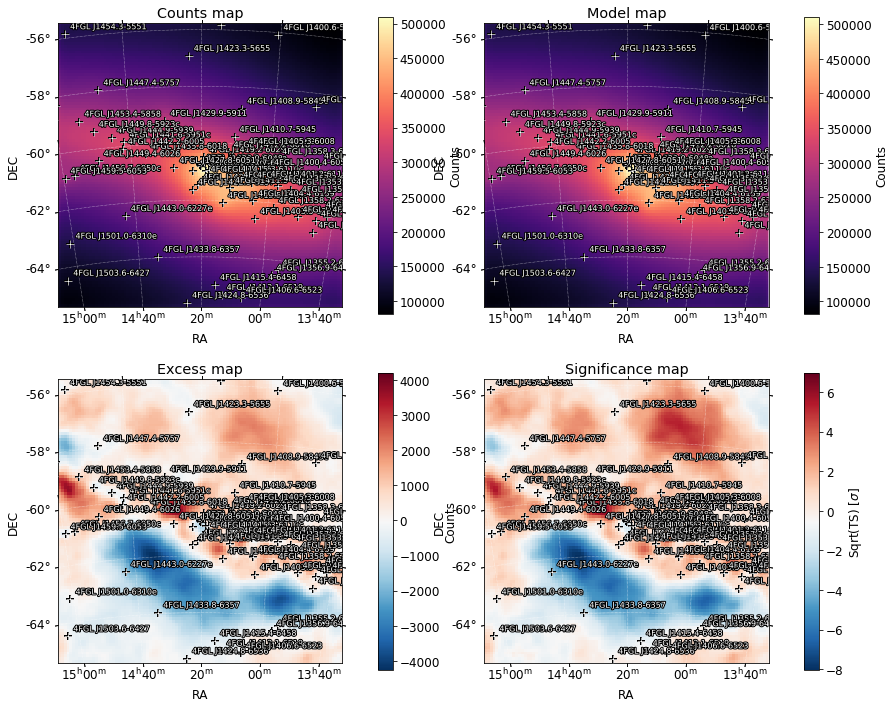

In [9]:
fig = plt.figure(figsize=(14,12))
ROIPlotter(residmap_fermipy['data'],roi=gta.roi).plot(subplot=221,cmap='magma',cb_label='Counts')
plt.gca().set_title('Counts map')
ROIPlotter(residmap_fermipy['model'],roi=gta.roi).plot(subplot=222,cmap='magma',cb_label='Counts')
plt.gca().set_title('Model map')
ROIPlotter(residmap_fermipy['excess'],roi=gta.roi).plot(subplot=223,cmap='RdBu_r',cb_label='Counts')
plt.gca().set_title('Excess map')
ROIPlotter(residmap_fermipy['sigma'],roi=gta.roi).plot(subplot=224,cmap='RdBu_r',cb_label='Sqrt(TS) [$\sigma$]')
plt.gca().set_title('Significance map')
plt.show()

We can clearly see that the **number of counts** in the **convolved** counts and the model map is much greater than that of those **before convolution**.<br>
The excess and significance map show several **big patches of highly negative / positive excess** even though the fit was returned successfully. The significance histogram looks like this.

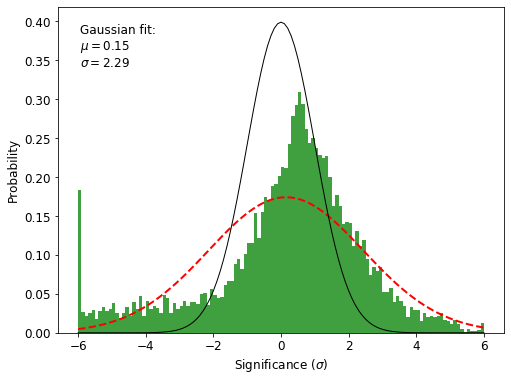

In [10]:
# Make a residual sigma histogram
fig, ax = plt.subplots(figsize=(8,6))
nBins = np.linspace(-6, 6, 121)
data = np.nan_to_num(residmap_fermipy['sigma'].data)
# find best fit parameters
mu, sigma = norm.fit(data.flatten())
# make and draw the histogram
data[data > 6.0] = 6.0
data[data < -6.0] = -6.0

n, bins, patches = ax.hist(data.flatten(), nBins, density=True,
                            histtype='stepfilled',
                            facecolor='green', alpha=0.75)
# make and draw best fit line
y = norm.pdf(bins, mu, sigma)
ax.plot(bins, y, 'r--', linewidth=2)
y = norm.pdf(bins, 0.0, 1.0)
ax.plot(bins, y, 'k', linewidth=1)

# labels and such
ax.set_xlabel(r'Significance ($\sigma$)')
ax.set_ylabel('Probability')
paramtext = 'Gaussian fit:\n'
paramtext += '$\\mu=%.2f$\n' % mu
paramtext += '$\\sigma=%.2f$' % sigma
ax.text(0.05, 0.95, paramtext, verticalalignment='top',
        horizontalalignment='left', transform=ax.transAxes)

#plt.savefig(utils.format_filename(workdir,'residmap_sigma_hist',prefix=[prefix],extension=fmt))
plt.show()
plt.close(fig)

By looking at the residual excess and significance map and its histogram above, you are most likely to conclude that the model is not explaining the data well and would try many different things to resolve the excess regions which often takes long time and much effort.<br><br>
However, the residual maps generated with the counts and model map **before convolution** look very different from the above. It can be generated by using <code>residmap()</code> method of *residmap_conv*.<br><br>
It takes the same arguments as <code>residmap()</code> in Fermipy, such as <code>make_plots</code> and <code>write_npy</code>. There are two differences between *residmap_conv* and Fermipy:
- The GTAnalysis object of the analysis, <code>gta</code> in this code, must be included as the first argument.
- The argument <code>convolve</code> can be set to either <code>True</code> or <code>False</code>. <code>convolve=True</code> uses the convolved counts and model map to generate residual maps and give the same result as Fermipy. <code>convolve=False</code> uses the counts and model map before convolution to generate residual maps. If this argument is not given, it will be automatically set to <code>convolve=True</code>.

So in case you forget to include <code>gta</code> and <code>convolve</code> arguments, you will just be using <code>residmap()</code> of Fermipy.<br><br>

*residmap_conv* is loaded from where it is located.

In [11]:
import sys
sys.path.append(wdir)
import residmap_conv as RES

Let's first try to reproduce the result from Fermipy with *resmap_conv* by setting <code>convolve=True</code>.

In [12]:
residmap_conv_true = RES.residmap(gta, convolve=True, make_plots=False, write_npy=False)

2021-10-19 13:31:24 INFO    GTAnalysis.residmap(): Generating residual maps
2021-10-19 13:31:25 INFO    GTAnalysis.add_source(): Adding source residmap_testsource
2021-10-19 13:31:29 INFO    GTAnalysis.delete_source(): Deleting source residmap_testsource
2021-10-19 13:31:30 INFO    GTAnalysis.residmap(): Finished residual maps
2021-10-19 13:32:08 INFO    GTAnalysis.residmap(): Execution time: 43.02 s


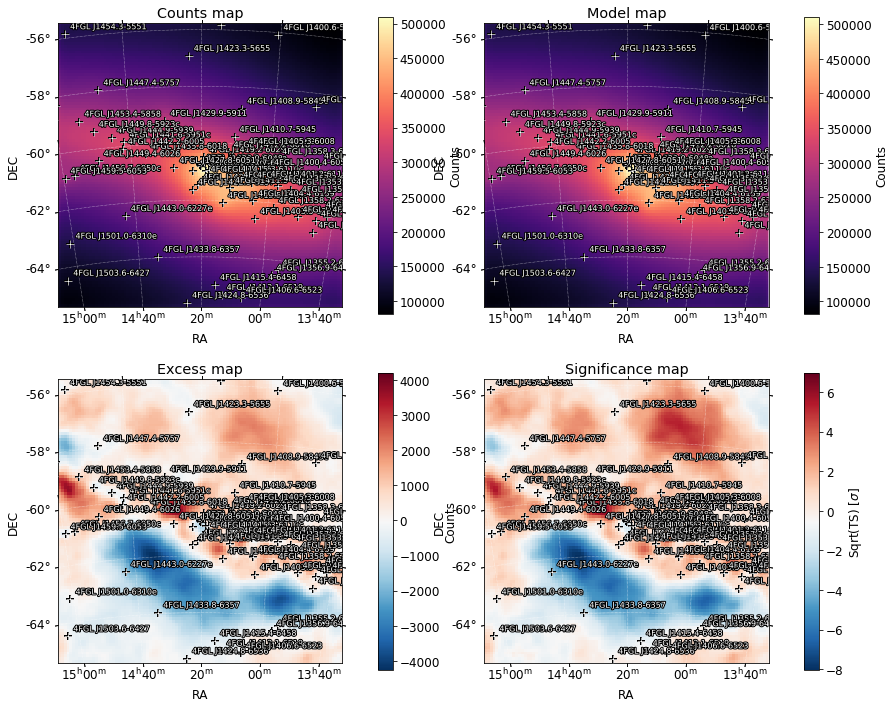

In [13]:
fig = plt.figure(figsize=(14,12))
ROIPlotter(residmap_conv_true['data'],roi=gta.roi).plot(subplot=221,cmap='magma',cb_label='Counts')
plt.gca().set_title('Counts map')
ROIPlotter(residmap_conv_true['model'],roi=gta.roi).plot(subplot=222,cmap='magma',cb_label='Counts')
plt.gca().set_title('Model map')
ROIPlotter(residmap_conv_true['excess'],roi=gta.roi).plot(subplot=223,cmap='RdBu_r',cb_label='Counts')
plt.gca().set_title('Excess map')
ROIPlotter(residmap_conv_true['sigma'],roi=gta.roi).plot(subplot=224,cmap='RdBu_r',cb_label='Sqrt(TS) [$\sigma$]')
plt.gca().set_title('Significance map')
plt.show()

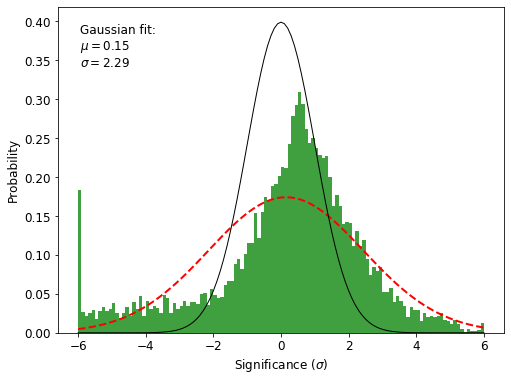

In [14]:
# Make a residual sigma histogram
fig, ax = plt.subplots(figsize=(8,6))
nBins = np.linspace(-6, 6, 121)
data = np.nan_to_num(residmap_conv_true['sigma'].data)
# find best fit parameters
mu, sigma = norm.fit(data.flatten())
# make and draw the histogram
data[data > 6.0] = 6.0
data[data < -6.0] = -6.0

n, bins, patches = ax.hist(data.flatten(), nBins, density=True,
                            histtype='stepfilled',
                            facecolor='green', alpha=0.75)
# make and draw best fit line
y = norm.pdf(bins, mu, sigma)
ax.plot(bins, y, 'r--', linewidth=2)
y = norm.pdf(bins, 0.0, 1.0)
ax.plot(bins, y, 'k', linewidth=1)

# labels and such
ax.set_xlabel(r'Significance ($\sigma$)')
ax.set_ylabel('Probability')
paramtext = 'Gaussian fit:\n'
paramtext += '$\\mu=%.2f$\n' % mu
paramtext += '$\\sigma=%.2f$' % sigma
ax.text(0.05, 0.95, paramtext, verticalalignment='top',
        horizontalalignment='left', transform=ax.transAxes)

#plt.savefig(utils.format_filename(workdir,'residmap_sigma_hist',prefix=[prefix],extension=fmt))
plt.show()
plt.close(fig)

They look exactly the same as those generated by Fermipy as they are supposed to. Let's see how it changes when we **turn off the convolution** by setting <code>convolve=False</code>.

In [15]:
residmap_conv_false = RES.residmap(gta, convolve=False, make_plots=False, write_npy=False)

2021-10-19 13:32:15 INFO    GTAnalysis.residmap(): Generating residual maps
2021-10-19 13:32:15 INFO    GTAnalysis.residmap(): Finished residual maps
2021-10-19 13:32:52 INFO    GTAnalysis.residmap(): Execution time: 37.81 s


(It takes less time than Fermipy for sure because it skips the convolution.)

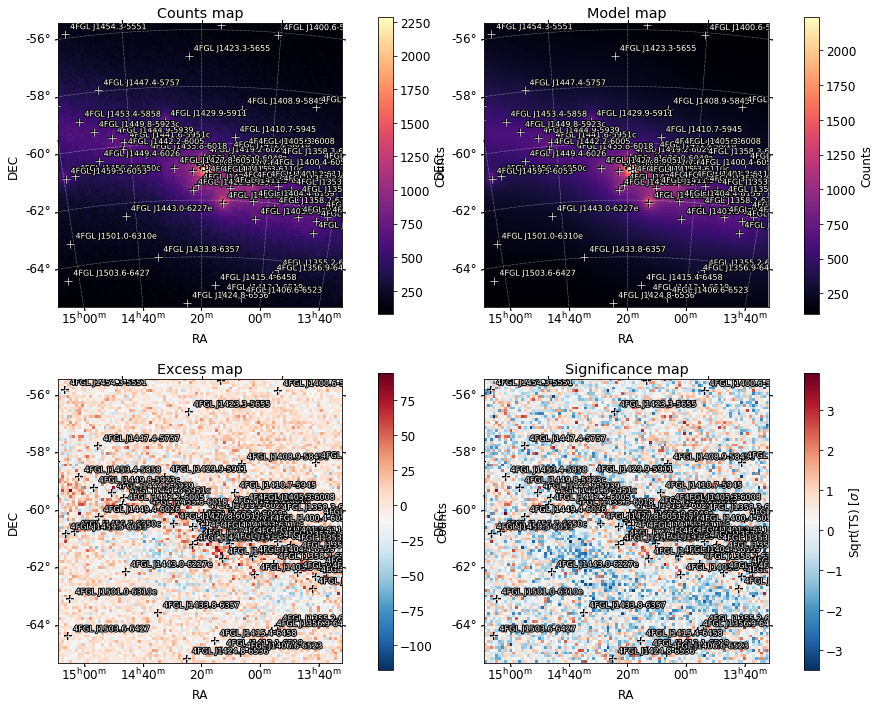

In [16]:
fig = plt.figure(figsize=(14,12))
ROIPlotter(residmap_conv_false['data'],roi=gta.roi).plot(subplot=221,cmap='magma',cb_label='Counts')
plt.gca().set_title('Counts map')
ROIPlotter(residmap_conv_false['model'],roi=gta.roi).plot(subplot=222,cmap='magma',cb_label='Counts')
plt.gca().set_title('Model map')
ROIPlotter(residmap_conv_false['excess'],roi=gta.roi).plot(subplot=223,cmap='RdBu_r',cb_label='Counts')
plt.gca().set_title('Excess map')
ROIPlotter(residmap_conv_false['sigma'],roi=gta.roi).plot(subplot=224,cmap='RdBu_r',cb_label='Sqrt(TS) [$\sigma$]')
plt.gca().set_title('Significance map')
plt.show()

The counts and model map that were used to generate the residual maps look exactly the same as those presented at the very beginning, because they are the same (not convolved)!<br><br>
The excess and significance map look very different from those generated by Fermipy. **The pattern of positive / negative patches looks similar to that of Fermipy, but the number of excess counts and their significance levels are much smaller.** The significance histogram now looks like this.

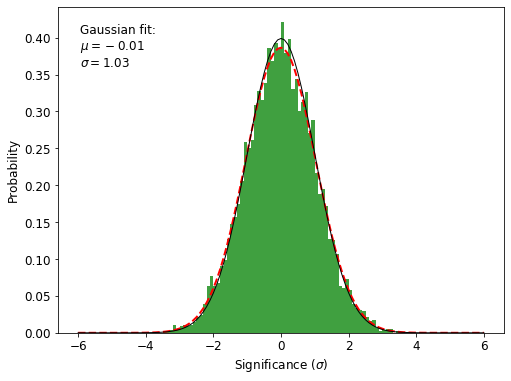

In [17]:
# Make a residual sigma histogram
fig, ax = plt.subplots(figsize=(8,6))
nBins = np.linspace(-6, 6, 121)
data = np.nan_to_num(residmap_conv_false['sigma'].data)
# find best fit parameters
mu, sigma = norm.fit(data.flatten())
# make and draw the histogram
data[data > 6.0] = 6.0
data[data < -6.0] = -6.0

n, bins, patches = ax.hist(data.flatten(), nBins, density=True,
                            histtype='stepfilled',
                            facecolor='green', alpha=0.75)
# make and draw best fit line
y = norm.pdf(bins, mu, sigma)
ax.plot(bins, y, 'r--', linewidth=2)
y = norm.pdf(bins, 0.0, 1.0)
ax.plot(bins, y, 'k', linewidth=1)

# labels and such
ax.set_xlabel(r'Significance ($\sigma$)')
ax.set_ylabel('Probability')
paramtext = 'Gaussian fit:\n'
paramtext += '$\\mu=%.2f$\n' % mu
paramtext += '$\\sigma=%.2f$' % sigma
ax.text(0.05, 0.95, paramtext, verticalalignment='top',
        horizontalalignment='left', transform=ax.transAxes)

#plt.savefig(utils.format_filename(workdir,'residmap_sigma_hist',prefix=[prefix],extension=fmt))
plt.show()
plt.close(fig)

As you could easily guess from the significance levels and their distribution in the significance map, it is almost perfect Gaussian. From these residual maps and the histogram, you will conclude that the model is explaining the data well.

Convolution is for better visualization of data, and therefore, it is not supposed to distort the underlying data to a great extent. However, **in regions with large fluctuations such as near the Galactic plane, convoluting the counts and model map seems to overly correlate the fluctuations and in turn exagerate the excess counts and their significance levels**.<br><br>
There is no reason for using the convolved data and model map to generate residual maps. Rather, for accuracy, we should use the data and model map without convolution.